<a href="https://colab.research.google.com/github/Guchigbu/dsddd/blob/main/Corrected_Autoregression_Time_series_Analysis_for_NATIONHOOD_and_DEMOCRACY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This code page contains the autogression analysis (and its dataset) conducted for NATIONHOOD (Chapter Four) and DEMOCRACY (Chapter Six) of the this: METAPHORICAL CONCEPTUALISATION OF NATIONHOOD AND
#DEMOCRACY IN NIGERIAN POLITICAL DISCOURSE (1960-2024)

AR(1) MODEL RESULTS
                            OLS Regression Results                            
Dep. Variable:               Metaphor   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     7.297
Date:                Mon, 07 Jul 2025   Prob (F-statistic):            0.00889
Time:                        12:58:19   Log-Likelihood:                -165.21
No. Observations:                  64   AIC:                             334.4
Df Residuals:                      62   BIC:                             338.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4371      0.472

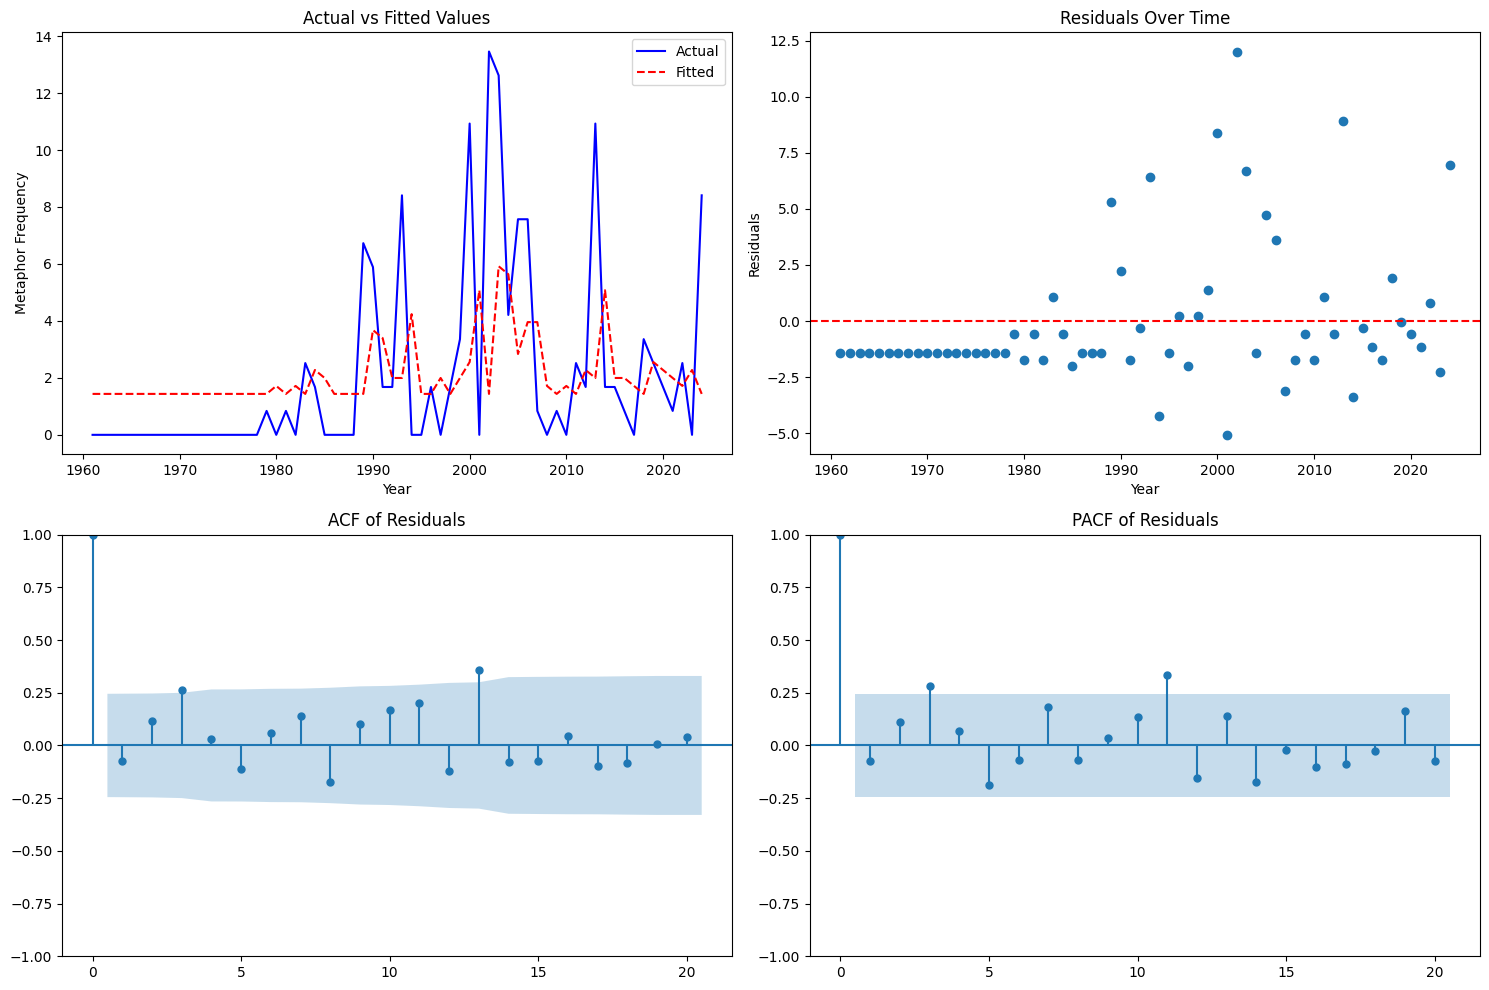

<Figure size 600x600 with 0 Axes>

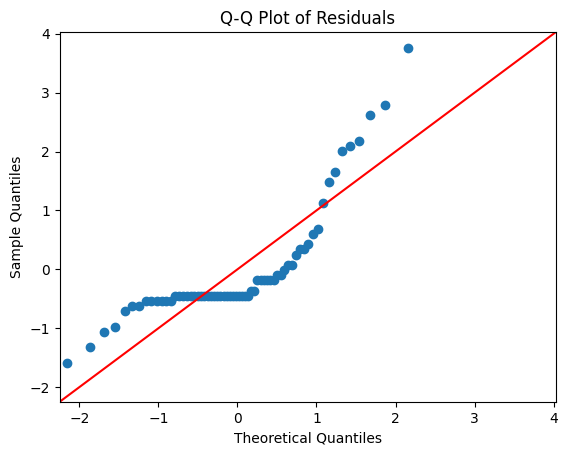

In [ ]:
#correct time series for PERSON (DEMOCRACY) (Chapter six)


import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = {
    'Year': range(1960, 2025),
    'Metaphor': [
        0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,
        0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.84,
        0.00, 0.84, 0.00, 2.52, 1.68, 0.00, 0.00, 0.00, 0.00, 6.73,
        5.89, 1.68, 1.68, 8.41, 0.00, 0.00, 1.68, 0.00, 1.68, 3.36,
        10.93, 0.00, 13.46, 12.62, 4.21, 7.57, 7.57, 0.84, 0.00, 0.84,
        0.00, 2.52, 1.68, 10.93, 1.68, 1.68, 0.84, 0.00, 3.36, 2.52,
        1.68, 0.84, 2.52, 0.00, 8.41
    ]
}

df = pd.DataFrame(data)

# Create lagged variable
df['Lag1'] = df['Metaphor'].shift(1)

# Drop the first row (NA due to lagging)
df = df.dropna()

# Fit AR(1) model
X = sm.add_constant(df['Lag1'])  # Add intercept
model = sm.OLS(df['Metaphor'], X)
results = model.fit()

# Model summary
print("="*50)
print("AR(1) MODEL RESULTS")
print("="*50)
print(results.summary())
print("\n")

# Residual diagnostics
residuals = results.resid

# Normality test (Shapiro-Wilk)
shapiro_test = stats.shapiro(residuals)
print("="*50)
print("RESIDUAL NORMALITY TEST")
print("="*50)
print(f"Shapiro-Wilk test: W = {shapiro_test[0]:.3f}, p = {shapiro_test[1]:.3f}")
if shapiro_test[1] > 0.05:
    print("Residuals are normally distributed (p > 0.05)")
else:
    print("Residuals are NOT normally distributed (p ≤ 0.05)")
print("\n")

# Autocorrelation tests
print("="*50)
print("RESIDUAL AUTOCORRELATION TESTS")
print("="*50)
print("Ljung-Box Test (Q-statistic):")
lb_test = acorr_ljungbox(residuals, lags=[5, 10], return_df=True)
print(lb_test)
print("\n")

# Visualization
plt.figure(figsize=(15, 10))

# 1. Time series plot
plt.subplot(2, 2, 1)
plt.plot(df['Year'], df['Metaphor'], 'b-', label='Actual')
plt.plot(df['Year'], results.fittedvalues, 'r--', label='Fitted')
plt.title('Actual vs Fitted Values')
plt.xlabel('Year')
plt.ylabel('Metaphor Frequency')
plt.legend()

# 2. Residual plot
plt.subplot(2, 2, 2)
plt.scatter(df['Year'], residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Over Time')
plt.xlabel('Year')
plt.ylabel('Residuals')

# 3. ACF plot
plt.subplot(2, 2, 3)
plot_acf(residuals, lags=20, ax=plt.gca())
plt.title('ACF of Residuals')

# 4. PACF plot
plt.subplot(2, 2, 4)
plot_pacf(residuals, lags=20, ax=plt.gca())
plt.title('PACF of Residuals')

plt.tight_layout()
plt.show()

# Additional diagnostic: QQ plot
plt.figure(figsize=(6, 6))
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.show()

AR(1) MODEL RESULTS
                                  OLS Regression Results                                  
Dep. Variable:     PERCENTAGE OF JOURNEY METAPHOR   R-squared:                       0.006
Model:                                        OLS   Adj. R-squared:                 -0.010
Method:                             Least Squares   F-statistic:                    0.3884
Date:                            Sat, 16 Aug 2025   Prob (F-statistic):              0.535
Time:                                    05:16:53   Log-Likelihood:                -17.669
No. Observations:                              64   AIC:                             39.34
Df Residuals:                                  62   BIC:                             43.66
Df Model:                                       1                                         
Covariance Type:                        nonrobust                                         
                 coef    std err          t      P>|t|      [0.025    

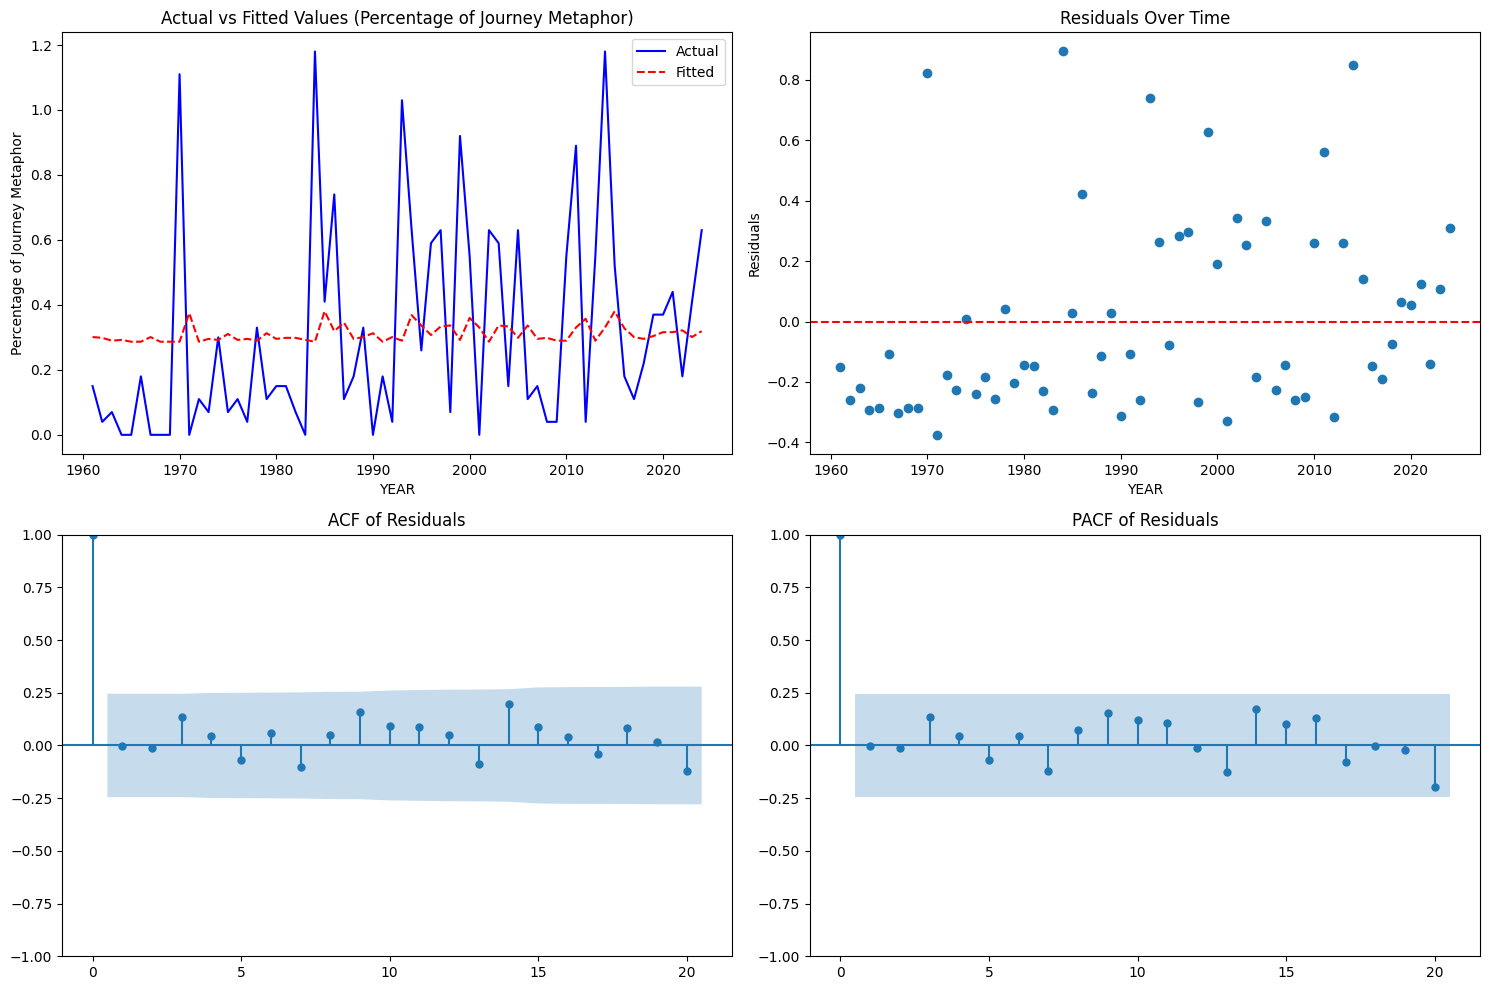

<Figure size 600x600 with 0 Axes>

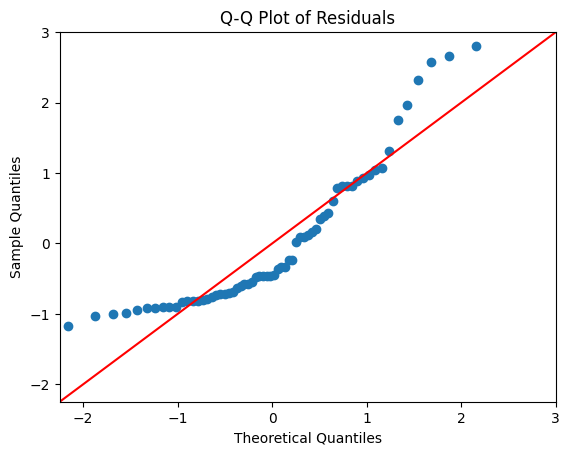

In [ ]:
#correct time series for JOURNEY (NATIONHOOD) Latest August, 2025 (CHAPTER Four)


import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = {
    # The 'YEAR' column now ranges from 1960 to 2024.
    'YEAR': range(1960, 2025),
    # The 'PERCENTAGE OF JOURNEY METAPHOR' column contains the new metaphor usage values.
    'PERCENTAGE OF JOURNEY METAPHOR': [
        0.18, 0.15, 0.04, 0.07, 0.00, 0.00, 0.18, 0.00, 0.00, 0.00,
        1.11, 0.00, 0.11, 0.07, 0.30, 0.07, 0.11, 0.04, 0.33, 0.11,
        0.15, 0.15, 0.07, 0.00, 1.18, 0.41, 0.74, 0.11, 0.18, 0.33,
        0.00, 0.18, 0.04, 1.03, 0.63, 0.26, 0.59, 0.63, 0.07, 0.92,
        0.55, 0.00, 0.63, 0.59, 0.15, 0.63, 0.11, 0.15, 0.04, 0.04,
        0.55, 0.89, 0.04, 0.55, 1.18, 0.52, 0.18, 0.11, 0.22, 0.37,
        0.37, 0.44, 0.18, 0.41, 0.63
    ]
}

df = pd.DataFrame(data)

# Create lagged variable
# The lagged variable is now based on 'PERCENTAGE OF JOURNEY METAPHOR'.
df['Lag1'] = df['PERCENTAGE OF JOURNEY METAPHOR'].shift(1)

# Drop the first row (NA due to lagging)
df = df.dropna()

# Fit AR(1) model
# The dependent variable is now 'PERCENTAGE OF JOURNEY METAPHOR'.
X = sm.add_constant(df['Lag1'])  # Add intercept
model = sm.OLS(df['PERCENTAGE OF JOURNEY METAPHOR'], X)
results = model.fit()

# Model summary
print("="*50)
print("AR(1) MODEL RESULTS")
print("="*50)
print(results.summary())
print("\n")

# Residual diagnostics
residuals = results.resid

# Normality test (Shapiro-Wilk)
shapiro_test = stats.shapiro(residuals)
print("="*50)
print("RESIDUAL NORMALITY TEST")
print("="*50)
print(f"Shapiro-Wilk test: W = {shapiro_test[0]:.3f}, p = {shapiro_test[1]:.3f}")
if shapiro_test[1] > 0.05:
    print("Residuals are normally distributed (p > 0.05)")
else:
    print("Residuals are NOT normally distributed (p ≤ 0.05)")
print("\n")

# Autocorrelation tests
print("="*50)
print("RESIDUAL AUTOCORRELATION TESTS")
print("="*50)
print("Ljung-Box Test (Q-statistic):")
lb_test = acorr_ljungbox(residuals, lags=[5, 10], return_df=True)
print(lb_test)
print("\n")

# Visualization
plt.figure(figsize=(15, 10))

# 1. Time series plot
# Plotting 'YEAR' against 'PERCENTAGE OF JOURNEY METAPHOR' and fitted values.
plt.subplot(2, 2, 1)
plt.plot(df['YEAR'], df['PERCENTAGE OF JOURNEY METAPHOR'], 'b-', label='Actual')
plt.plot(df['YEAR'], results.fittedvalues, 'r--', label='Fitted')
plt.title('Actual vs Fitted Values (Percentage of Journey Metaphor)')
plt.xlabel('YEAR')
plt.ylabel('Percentage of Journey Metaphor')
plt.legend()

# 2. Residual plot
# Plotting residuals against 'YEAR'.
plt.subplot(2, 2, 2)
plt.scatter(df['YEAR'], residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Over Time')
plt.xlabel('YEAR')
plt.ylabel('Residuals')

# 3. ACF plot
plt.subplot(2, 2, 3)
plot_acf(residuals, lags=20, ax=plt.gca())
plt.title('ACF of Residuals')

# 4. PACF plot
plt.subplot(2, 2, 4)
plot_pacf(residuals, lags=20, ax=plt.gca())
plt.title('PACF of Residuals')

plt.tight_layout()
plt.show()

# Additional diagnostic: QQ plot
plt.figure(figsize=(6, 6))
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.show()

AR(1) MODEL RESULTS
                                  OLS Regression Results                                 
Dep. Variable:     PERCENTAGE OF FAMILY METAPHOR   R-squared:                       0.080
Model:                                       OLS   Adj. R-squared:                  0.065
Method:                            Least Squares   F-statistic:                     5.409
Date:                           Sat, 16 Aug 2025   Prob (F-statistic):             0.0233
Time:                                   07:30:36   Log-Likelihood:                0.24580
No. Observations:                             64   AIC:                             3.508
Df Residuals:                                 62   BIC:                             7.826
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-

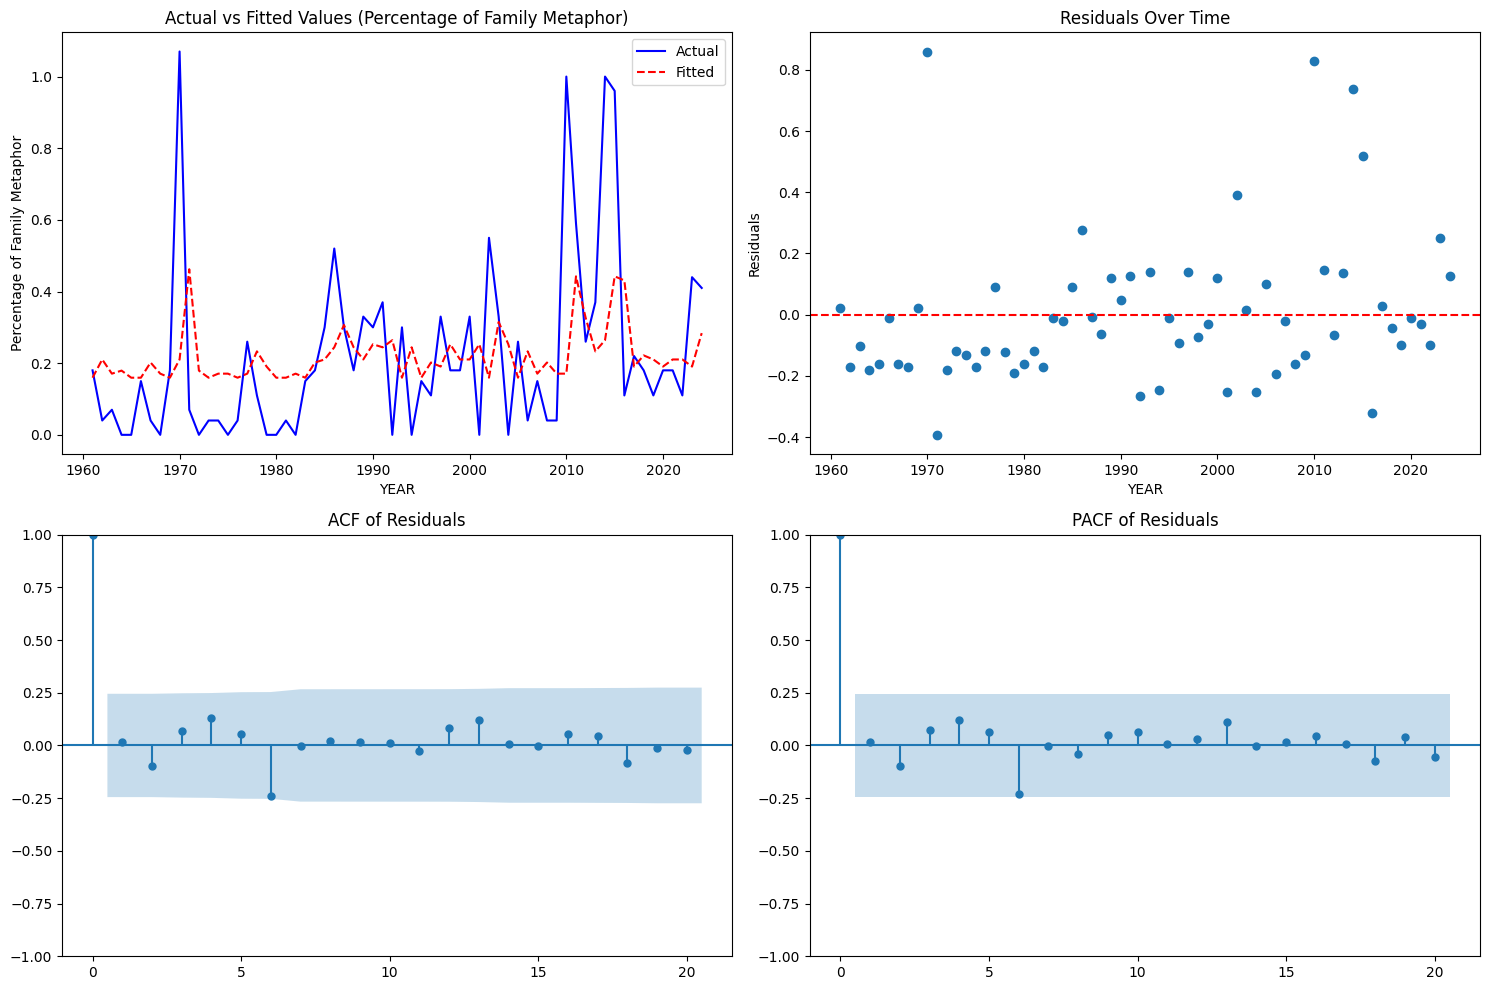

<Figure size 600x600 with 0 Axes>

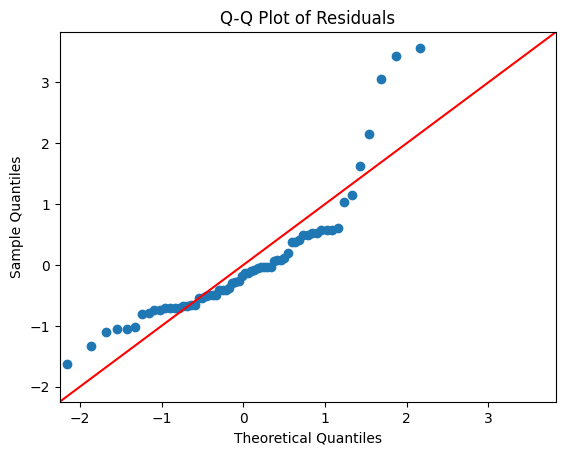

In [ ]:
#correct time series for FAMILY (NATIONHOOD) August, 2025 (CHAPTER four)

import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = {
    # Updated 'YEAR' column
    'YEAR': range(1960, 2025),
    # New 'PERCENTAGE OF FAMILY METAPHOR' data
    'PERCENTAGE OF FAMILY METAPHOR': [
        0.00, 0.18, 0.04, 0.07, 0.00, 0.00, 0.15, 0.04, 0.00, 0.18,
        1.07, 0.07, 0.00, 0.04, 0.04, 0.00, 0.04, 0.26, 0.11, 0.00,
        0.00, 0.04, 0.00, 0.15, 0.18, 0.30, 0.52, 0.30, 0.18, 0.33,
        0.30, 0.37, 0.00, 0.30, 0.00, 0.15, 0.11, 0.33, 0.18, 0.18,
        0.33, 0.00, 0.55, 0.33, 0.00, 0.26, 0.04, 0.15, 0.04, 0.04,
        1.00, 0.59, 0.26, 0.37, 1.00, 0.96, 0.11, 0.22, 0.18, 0.11,
        0.18, 0.18, 0.11, 0.44, 0.41
    ]
}

df = pd.DataFrame(data)

# Create lagged variable using the new metaphor column
df['Lag1'] = df['PERCENTAGE OF FAMILY METAPHOR'].shift(1)

# Drop the first row (NA due to lagging)
df = df.dropna()

# Fit AR(1) model using the new metaphor column
X = sm.add_constant(df['Lag1'])  # Add intercept
model = sm.OLS(df['PERCENTAGE OF FAMILY METAPHOR'], X)
results = model.fit()

# Model summary
print("="*50)
print("AR(1) MODEL RESULTS")
print("="*50)
print(results.summary())
print("\n")

# Residual diagnostics
residuals = results.resid

# Normality test (Shapiro-Wilk)
shapiro_test = stats.shapiro(residuals)
print("="*50)
print("RESIDUAL NORMALITY TEST")
print("="*50)
print(f"Shapiro-Wilk test: W = {shapiro_test[0]:.3f}, p = {shapiro_test[1]:.3f}")
if shapiro_test[1] > 0.05:
    print("Residuals are normally distributed (p > 0.05)")
else:
    print("Residuals are NOT normally distributed (p ≤ 0.05)")
print("\n")

# Autocorrelation tests
print("="*50)
print("RESIDUAL AUTOCORRELATION TESTS")
print("="*50)
print("Ljung-Box Test (Q-statistic):")
lb_test = acorr_ljungbox(residuals, lags=[5, 10], return_df=True)
print(lb_test)
print("\n")

# Visualization
plt.figure(figsize=(15, 10))

# 1. Time series plot - Updated column names and labels
plt.subplot(2, 2, 1)
plt.plot(df['YEAR'], df['PERCENTAGE OF FAMILY METAPHOR'], 'b-', label='Actual')
plt.plot(df['YEAR'], results.fittedvalues, 'r--', label='Fitted')
plt.title('Actual vs Fitted Values (Percentage of Family Metaphor)')
plt.xlabel('YEAR')
plt.ylabel('Percentage of Family Metaphor')
plt.legend()

# 2. Residual plot - Updated column names and labels
plt.subplot(2, 2, 2)
plt.scatter(df['YEAR'], residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Over Time')
plt.xlabel('YEAR')
plt.ylabel('Residuals')

# 3. ACF plot
plt.subplot(2, 2, 3)
plot_acf(residuals, lags=20, ax=plt.gca())
plt.title('ACF of Residuals')

# 4. PACF plot
plt.subplot(2, 2, 4)
plot_pacf(residuals, lags=20, ax=plt.gca())
plt.title('PACF of Residuals')

plt.tight_layout()
plt.show()

# Additional diagnostic: QQ plot
plt.figure(figsize=(6, 6))
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.show()